In [6]:
import re
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

In [7]:
#txt = "60        40        666.8     16.7      8.6          data_test=f['SUB_ARRAY_POINTING_'+SAP+'/BEAM_'+beam_this+'/STOKES_0']"
#pattern = r'[\d]+[.,\d]+|[\d]*[.][\d]+|[\d]+' #'^-?\d+(?:\.\d+)$'
#[float(s) for s in txt.split() if re.match(pattern, s)]

#f=open('filename')
#lines=f.readlines()

l_number_read  = [24,28,29,30,31,32,34,38]
#l_number_read = [30]

# IO  24
# cpu2gpu 28,29
# 30 conv 30
# gpu2cpu 31
# downsample 32 34 38



In [8]:
# read given line from file
def read_line(filename, line_number):
    with open(filename) as f:
        for i, line in enumerate(f):
            if i == line_number:
                return line

def extract_time_consumption(fname,l_lst=l_number_read):
    res = []
    for line in l_lst:
        line  =  read_line(fname,line-1).replace('-','')
    
        pattern = r'[\d]+[.,\d]+|[\d]*[.][\d]+|[\d]+' #'^-?\d+(?:\.\d+)$'
        res.append([float(s) for s in line.split() if re.match(pattern, s)])

    return res

In [9]:
bc_res  =[round(float(x[2]),1) for x in extract_time_consumption('benchmark_res/p_cuda_c8000_t320000.txt')]

In [10]:
print(np.round(bc_res[0],8),'&',round(bc_res[1]+bc_res[2],2),'&',
      round(bc_res[3],2),'&',round(bc_res[4],2),'&',
      round(bc_res[5]+bc_res[6]+bc_res[7],2),'&',
      round(np.sum(bc_res),2)
     )

5557.9 & 2549.5 & 5012.8 & 2937.8 & 5336.5 & 21394.5


In [52]:
batch_size = [1000,2000,4000,8000]#,16000,32000]

all_bench  = []
for c_str in batch_size:
    t_bench = [float(x[2]) for x in extract_time_consumption(
        'benchmark_res/p_cpu_c'
        +str(c_str)+'_t320000.txt')]
    all_bench.append(t_bench)

In [53]:
all_bench = np.array(all_bench)


[None, None]

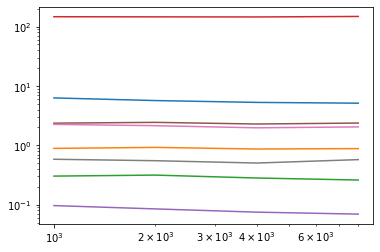

In [55]:
plt.figure()
ax =   plt.gca()
ax.plot(batch_size,all_bench/1000)
plt.setp(ax,yscale='log',xscale='log')
